    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37

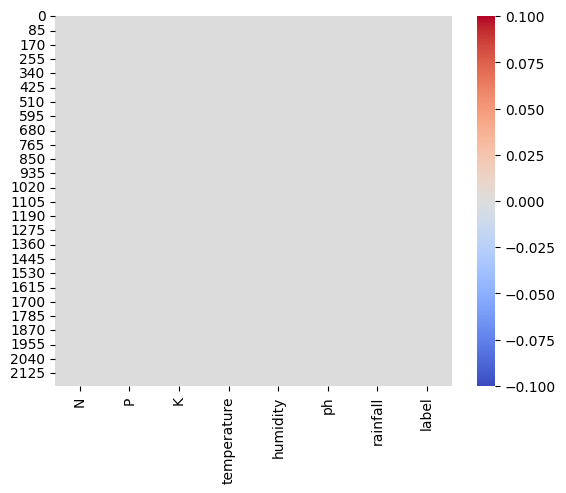

temperature
23.603016    1
20.879744    1
21.770462    1
23.004459    1
26.491096    1
            ..
26.800796    1
23.978982    1
26.527235    1
23.223974    1
24.515881    1
Name: count, Length: 2200, dtype: int64


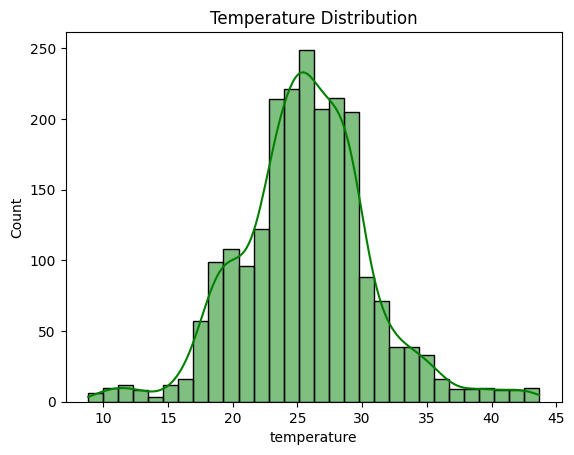

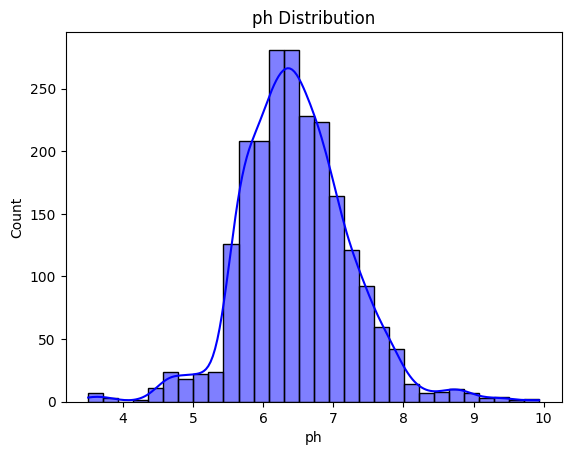

/tmp/ipykernel_386294/990704716.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=df, palette='plasma_r')


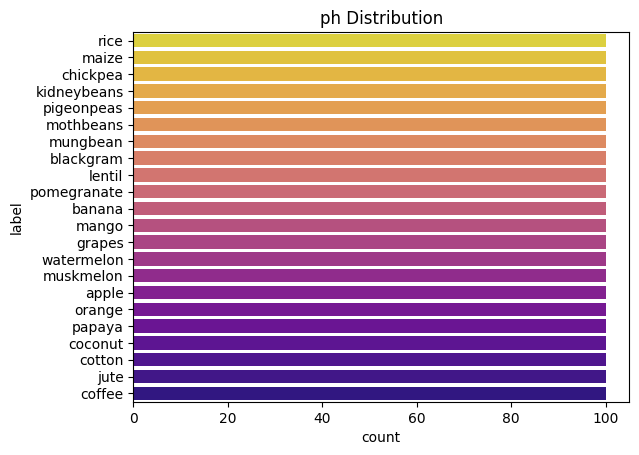

/tmp/ipykernel_386294/990704716.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label', x='ph', data=df, palette='plasma_r')


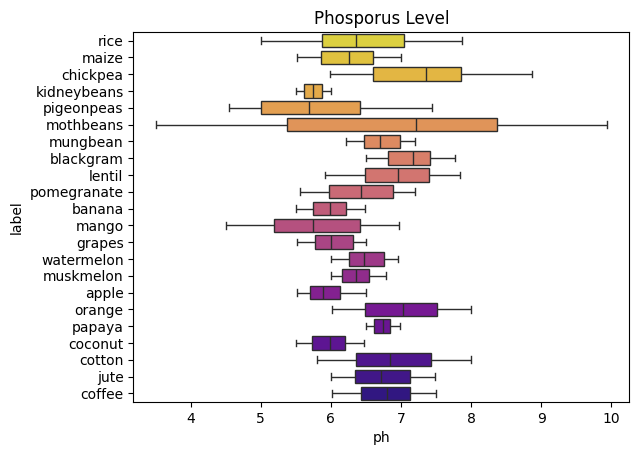

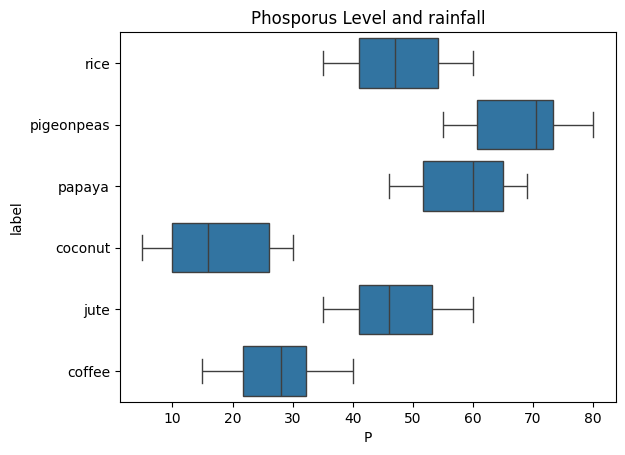

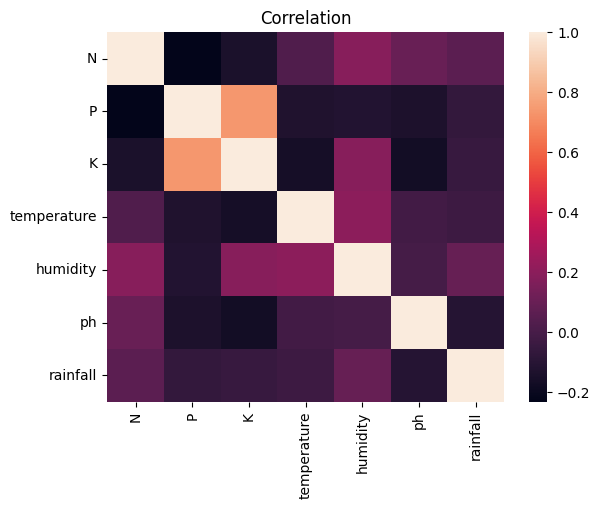

KNN accuracy score:  0.9681818181818181


In [5]:
#Machine Learning models, set training and testing data
# Ensure you have scikit-learn installed
# You can install it using: pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler

# Your existing code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('crop.csv')

# print few rows
print(df.head())

# check for null / missing values
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
# summary statistics
print(df.describe())

# check for null / missing values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(df.isnull(), cmap='coolwarm')
plt.show()

# Distribution of temperature and ph
print(df['temperature'].value_counts())
sns.histplot(df['temperature'], color='green', bins=30, kde=True)
plt.title('Temperature Distribution')
plt.show()

sns.histplot(df['ph'], color='blue', bins=30, kde=True)
plt.title('ph Distribution')
plt.show()

# Check if the dataset is balanced or not
sns.countplot(y='label', data=df, palette='plasma_r')
plt.title('ph Distribution')
plt.show()

# phosphorus level
sns.boxplot(y='label', x='ph', data=df, palette='plasma_r')
plt.title('Phosporus Level')
plt.show()

# phosphorus level basing on rainfall
sns.boxplot(y='label', x='P', data=df[df['rainfall'] > 150])
plt.title('Phosporus Level and rainfall')
plt.show()

# Visualisation Correlation
c = df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target'] = c.cat.codes

y = df.target
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Create correlation visualization
sns.heatmap(X.corr())
plt.title('Correlation')
plt.show()

# Machine Learning models, set training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# apply scaling to the test set
X_test_scaled = scaler.transform(X_test)

# selection of models, Knn, confusion matrix, classification report, accuracy score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)
print('KNN accuracy score: ', knn.score(X_test_scaled, y_test))



In [6]:
# classification using support vector machine
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
svc_linear.score(X_test_scaled, y_test)
print('Linear kernel accuracy score: ', svc_linear.score(X_test_scaled, y_test))
 
svc_poly = SVC(kernel='poly')  
svc_poly.fit(X_train_scaled, y_train)
svc_poly.score(X_test_scaled, y_test)
print('Polynomial kernel accuracy score: ', svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel='rbf')
svc_poly.fit(X_train_scaled, y_train)
svc_poly.score(X_test_scaled, y_test)
print('RBF kernel accuracy score: ', svc_poly.score(X_test_scaled,y_test))
# classification using logistic regression

Linear kernel accuracy score:  0.9568181818181818
Polynomial kernel accuracy score:  0.9636363636363636
RBF kernel accuracy score:  0.9681818181818181


In [7]:
# classify using decision tree
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt.score(X_test_scaled, y_test)
print('Decision tree accuracy score: ', dt.score(X_test_scaled, y_test))

Decision tree accuracy score:  0.9818181818181818


In [8]:
# classification using random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)
print('Random forest accuracy score: ', rf.score(X_test_scaled, y_test))

Random forest accuracy score:  0.9931818181818182


In [9]:
#Machine Learning models, set training and testing data
# split data into 3 categories
#Numerical ,Categorical and ordinal
#Numerical data
# Linear Regression and Logistic Regression

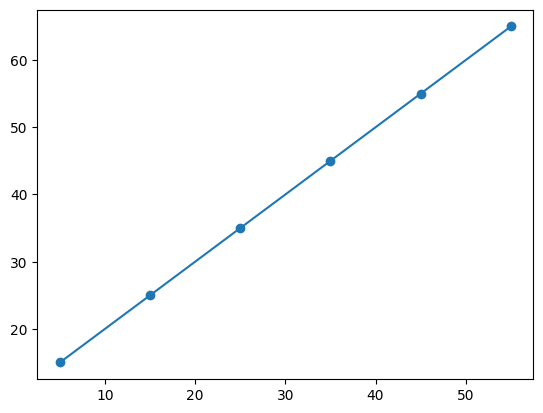

In [10]:
import matplotlib.pyplot as plt
from scipy import stats


x = [5,15,25,35,45,55]
y=[15,25,35,45,55,65]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)


def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

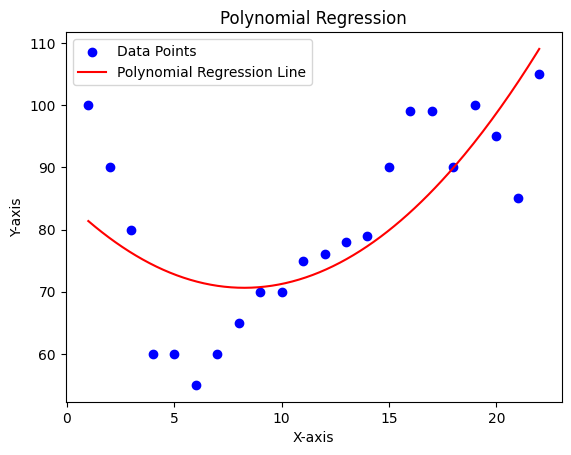

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
y = np.array([100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 90, 100, 95, 85, 105])

# Fit polynomial regression model (degree 2 for example)
degree = 2
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Generate x-values for smooth curve
x_new = np.linspace(x.min(), x.max(), 200)
y_new = polynomial(x_new)

# Plot scatter plot of the original data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot polynomial regression line
plt.plot(x_new, y_new, color='red', label='Polynomial Regression Line')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Polynomial Regression')
plt.legend()

# Show the plot
plt.show()